## Sod's Test Problem : The Shock Tube

##### Assignment
##### Laurent Pétré & Ilan Renous

We are going to describe the evolution of the pressure, the speed and density of a gaz in a shock tube using the Richtemyer method. Let's get strated!

In [4]:
# We import the libraries we will need
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline
from JSAnimation.IPython_display import display_animation
import matplotlib.animation as anim

### The shock Tube

A shock tube is an idealized device that generates a one-dimensional shock wave in a compressible gas. The setting allows an analytical solution of the Euler equations, which is very useful for comparing with the numerical results to assess their accuracy.

It consist in a tube separated in two part by a infinitely thin, rigid diaphragm. The regions on both side of that separation have different initial pressure and density and the gas is initailly at rest. At time $t = 0.0 s$, the diaphragm is ruptured instantaneously. An unsteady flow is thus establish consisting of:

* a shock wave traveling to the right
* an expansion wave traveling to the left
* a moving contact discontinuity

This problem can be illustared as follow:
![shocktube](../../lessons/03_wave/figures/shocktube.png)

###  Sock Tube's Equations 

Using Euler equation for a inviscid fluid with density $\rho$ and pressure $p$, that consist of the conservation laws of mass and momentum, and the energy equation, we get:

$$
\frac{\partial }{\partial t} \vec{\mathbf{u}} + \frac{\partial }{\partial x} \vec{\mathbf{f}} = 0
$$

where $$
\vec{\mathbf{u}} = \left[ \begin{array}{c}
\rho \\
\rho u \\
\rho e_T \\ 
\end{array} \right]$$

and $$
\vec{\mathbf{f}} = \left[ \begin{array}{c}
\rho u \\
\rho u^2 + p \\
(\rho e_T + p) u \\ \end{array} \right]
$$

Using now the equation state of an ideal gas, which is

$$e = e(\rho, p) = \frac{p}{(\gamma -1) \rho},$$

where $\gamma = 1.4$ is a reasonable value to model air

We can now express $p$ as 

$$p = (\gamma -1)\left(\rho e_T - \frac{\rho u^2}{2}\right).$$

Now, we need to express  $ \vec{\mathbf{f}}= 
\left[ \begin{array}{c}
f_1 \\
f_2 \\
f_3 \\ \end{array} \right]$ in terms of $\vec{\mathbf{u}} = 
\left[ \begin{array}{c}
u_1 \\
u_2 \\
u_3 \\ 
\end{array} \right]$

Using the expressions above and after some algebraic manipulations, we finaly get

$$\vec{\mathbf{f}} = \left[ \begin{array}{c}
f_1 \\
f_2 \\
f_3 \\ \end{array} \right] =
\left[ \begin{array}{c}
u_2\\
\frac{u^2_2}{u_1} + (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1} \right) \\
\left(u_3 + (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1}\right) \right) \frac{u_2}{u_1}\\ \end{array}
\right]$$



### Initial conditions

In a tube spanning from $x = -10 \text{m}$ to $x = 10 \text{m}$ with the rigid membrane at $x = 0 \text{m}$, we have the following initial gas states:

$$\vec{IC}_L = \left[ \begin{array}{c}
\rho_L \\ u_L \\ p_L \\ \end{array}\right] = 
\left[ \begin{array}{c}
1\ kg/m^3 \\ 0\ m/s \\ 100\ kN/m^2 \\ \end{array}\right]$$

$$\vec{IC}_R = \left[ \begin{array}{c}
\rho_R \\ u_R \\ p_R \\ \end{array}\right] = 
\left[ \begin{array}{c}
0.125\ kg/m^3 \\ 0\ m/s \\ 10\ kN/m^2 \\ \end{array}\right]$$

where $\vec{IC}_L$ are the initial density, velocity and pressure on the left side of the tube membrane and $\vec{IC}_R$ are the initial density, velocity and pressure on the right side of the tube membrane.

### The Richtmyer method

To solve this problem, we are going tu use the Richtmyer method, which is given by:

$$
\vec{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} = \frac{1}{2} \left( \vec{\mathbf{u}}^n_{i+1} + \vec{\mathbf{u}}^n_i \right) - 
\frac{\Delta t}{2 \Delta x} \left( \vec{\mathbf{f}}^n_{i+1} - \vec{\mathbf{f}}^n_i\right) $$ $$
\vec{\mathbf{u}}^{n+1}_i = \vec{\mathbf{u}}^n_i - \frac{\Delta t}{\Delta x} \left(\vec{\mathbf{f}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} - \vec{\mathbf{f}}^{n+\frac{1}{2}}_{i-\frac{1}{2}} \right)
$$


The flux vectors used in the second step are obtained by evaluating the flux functions on the output of the first step:

$$\vec{\mathbf{f}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} = \vec{\mathbf{f}}\left(\vec{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}}\right).$$

### Useful functions

In order to draw some animations, we need to save the datas then plot them. This is why we define two functions here. The first one is used as a callback in the solve function and allows us to save the datas. The second one is there to plot them for each iteration.

In [31]:
def save_data(n, u, u_f):
    """
    Save datas in array.
    
    Parameters
    ----------
    n: integer
        index of the data to save
        must not overpass N
        
    u: whatever
        data to save
    
    u_f: array[N] of whatever
        array to save the datas
    """
        
    u_f[n, :] = u

def set_plot(i, line, x, u):
    """
    Plot line for a given iteration.
    
    Parameters
    ----------
    i: integer
        iteration index
        must not overpass M
        
    line: matplolib line
        line to draw
        
    x: array[N] of floats
        data for the x axe
    
    u: array[MxN] of floats
        data for the y axe with the following structure : u[i, :]
    """
    
    line.set_data(x, u[i, :])

### First set of initial conditions

Let's take the following values for the first simulation:
* $V_{max}=22.22m/s$
* $\rho(0,t)=10$
* $\rho(x/[10,20],0) =10 \\\rho([10,20],0) = 50$

In [32]:
# Initial coniditions
t_to_sim = 360
nt = int(t_to_sim/dt)

rho0 = npy.ones(nx)*10.0
rho0[10:20] = 50.0

# Creation of the array to save the datas for the plot
rho = npy.empty((nt, 51))
rho[0, :] = rho0

solve(rho0, lambda n: 10.0, flux, dt, dx, nt, \
      lambda n, u: save_data(n, u, rho))

# The average speed at t=3min is given at the 49th line of the array
print(speed(npy.mean(rho[49, :]))) 
# For the minimum speed, we need the maximum density
print(speed(npy.amax(rho[99, :])))

20.634102285
18.7747620644


* The average speed at $t=3min$ is $V=20.63 m/s$
* The minimum speed at time $t=6min$ is $V=18.77m/s$


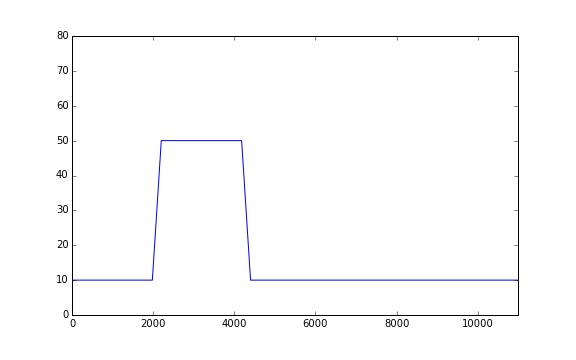
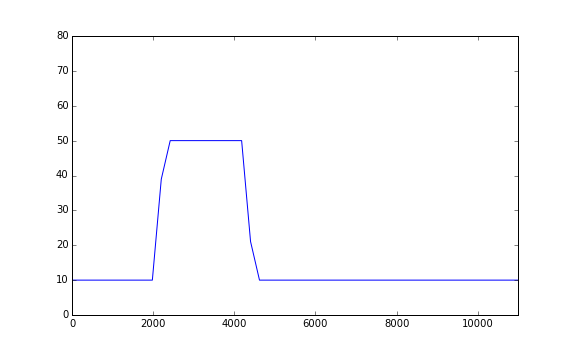
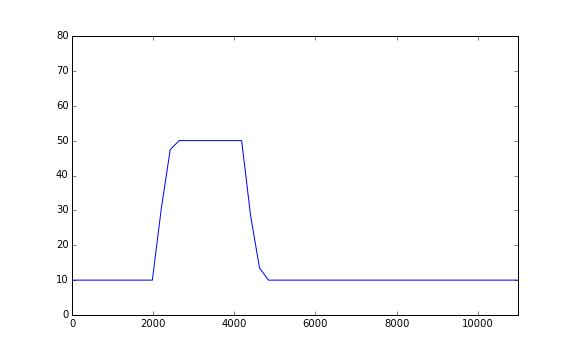
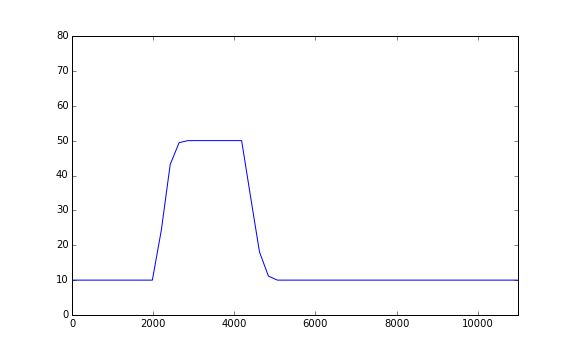
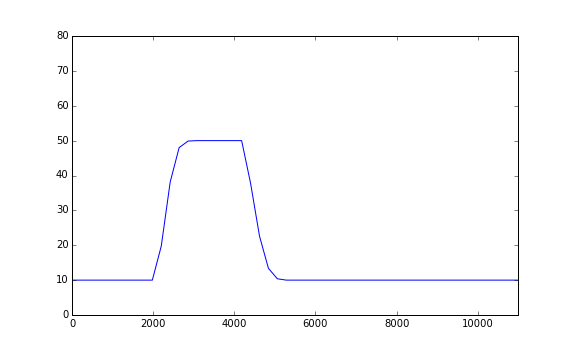
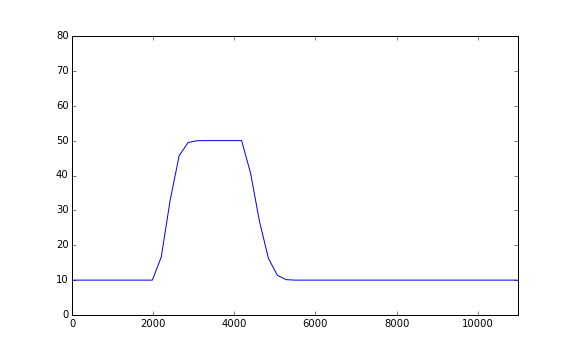
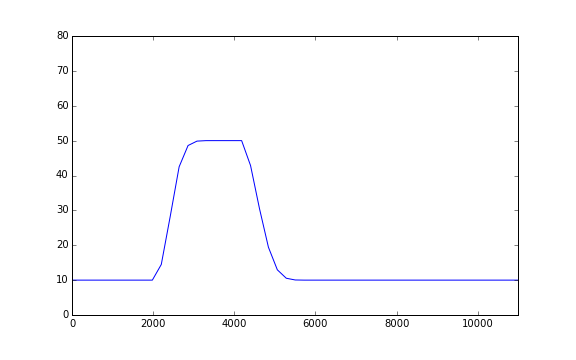
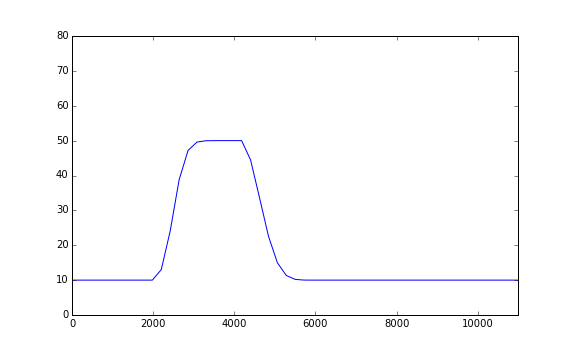
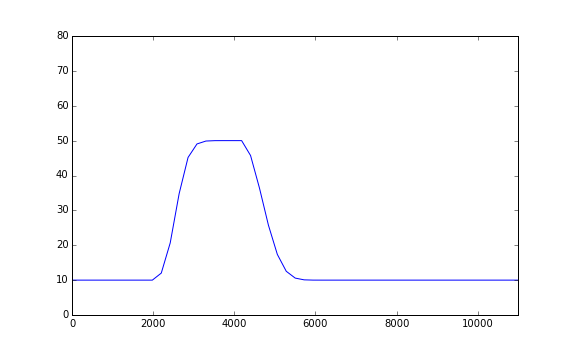
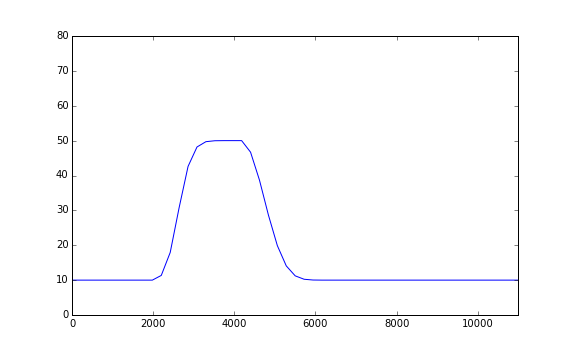
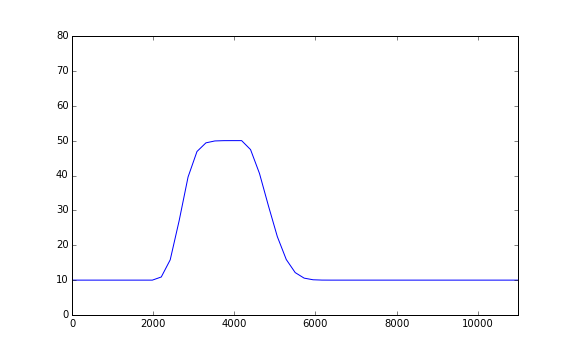
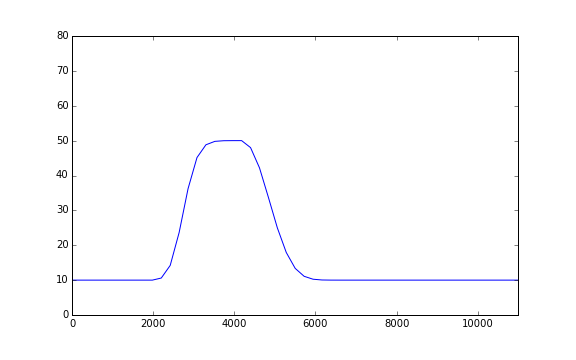
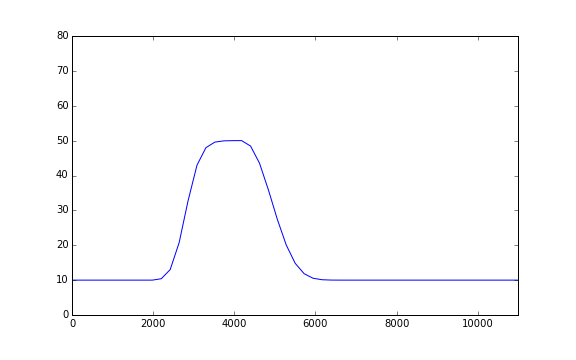
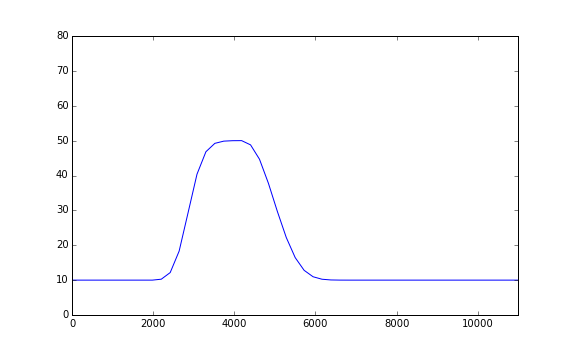
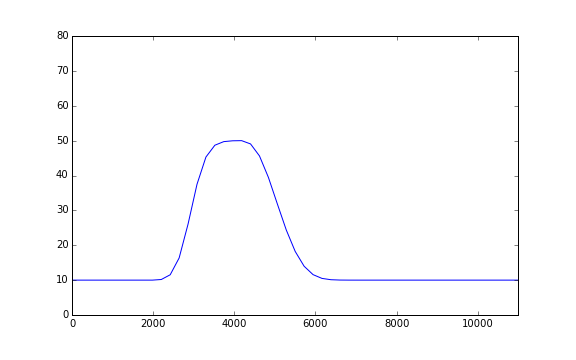
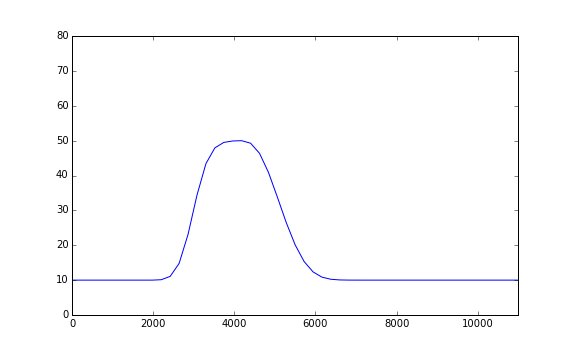
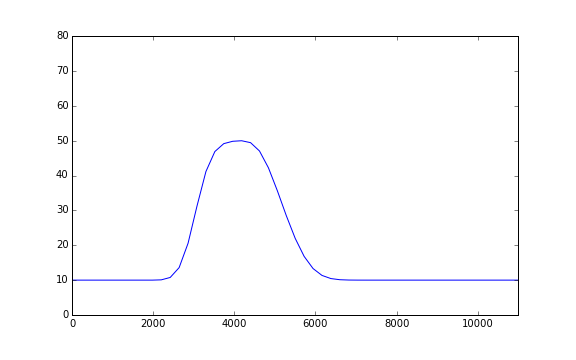
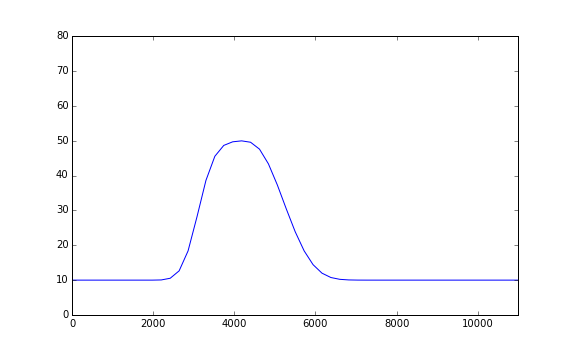
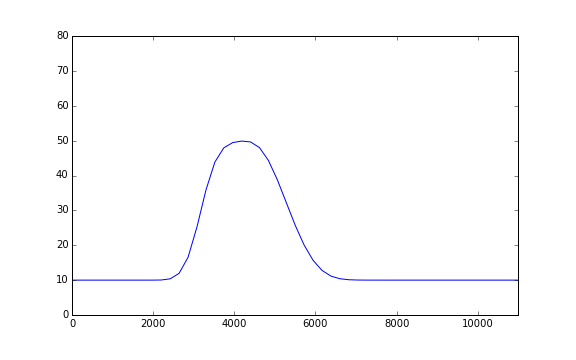
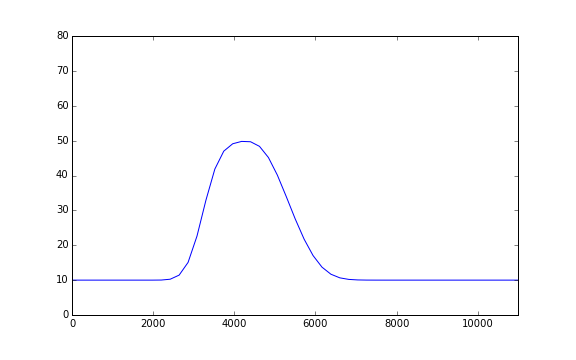
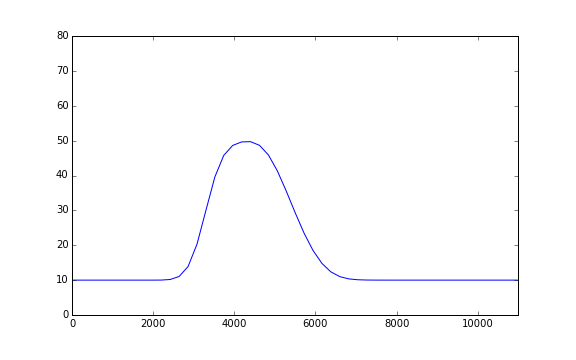
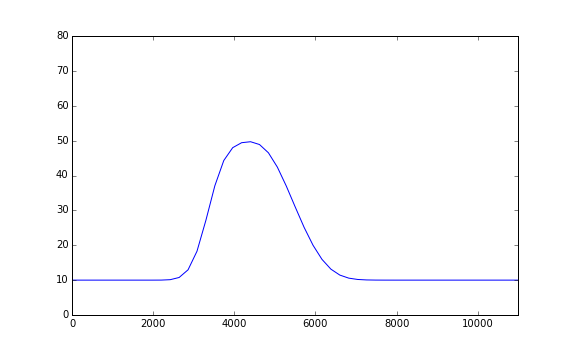
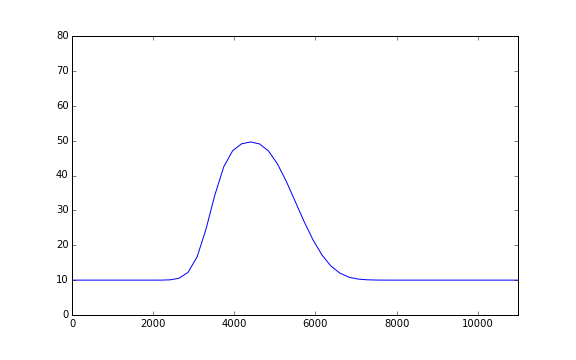
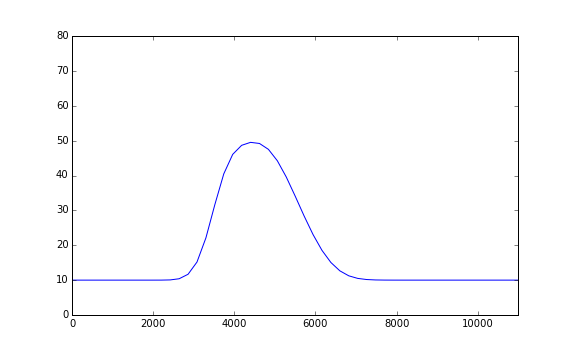
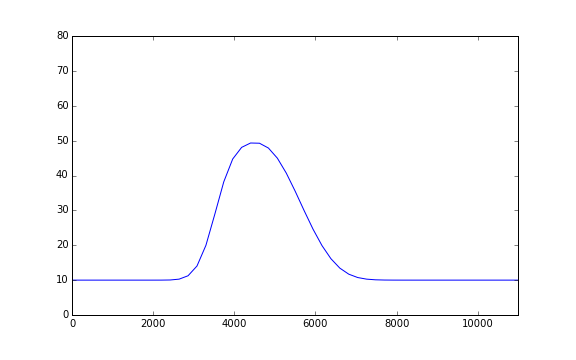
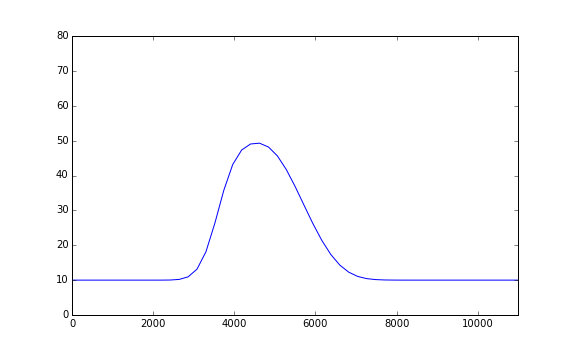
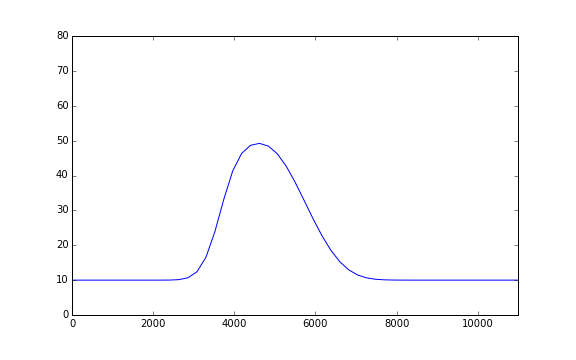
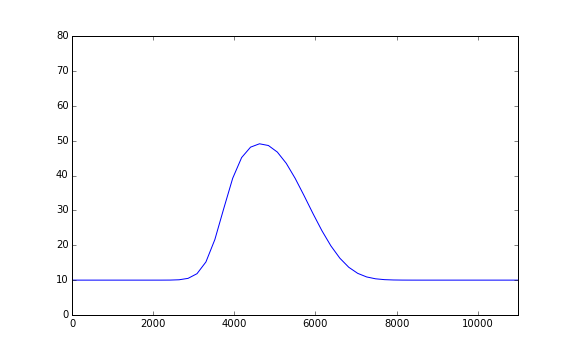
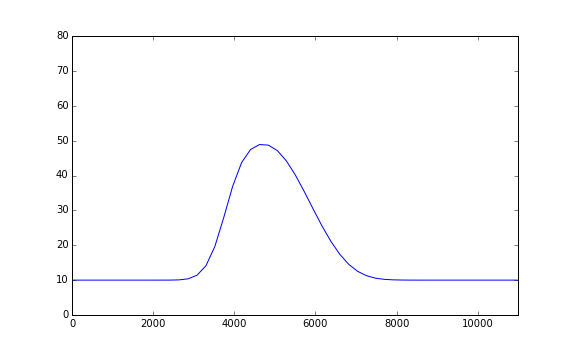
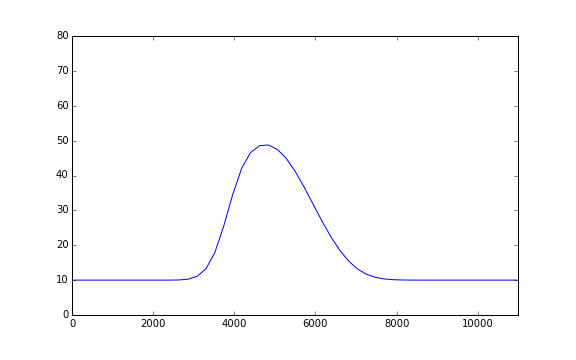
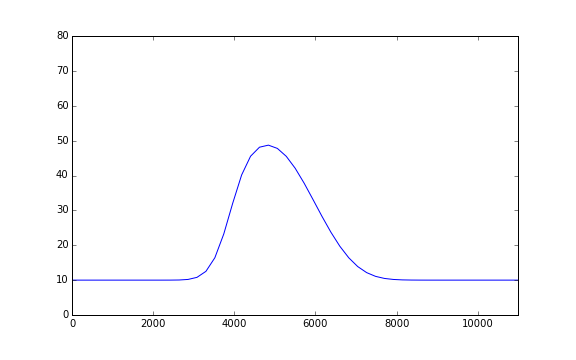
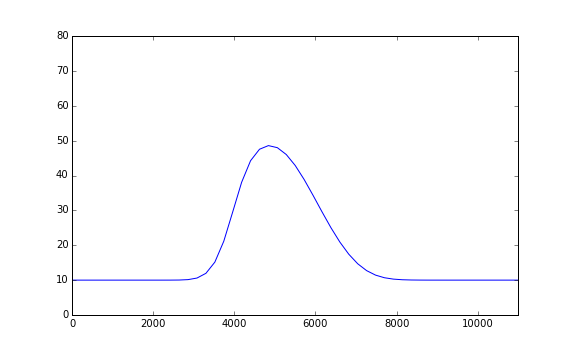
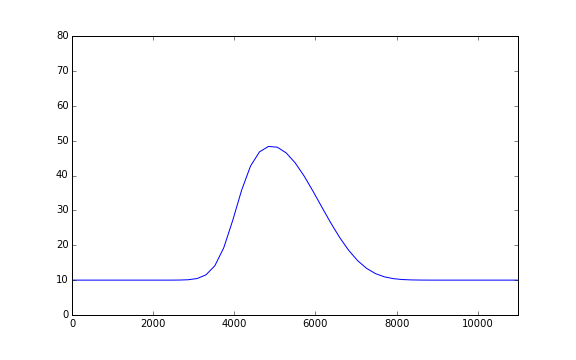
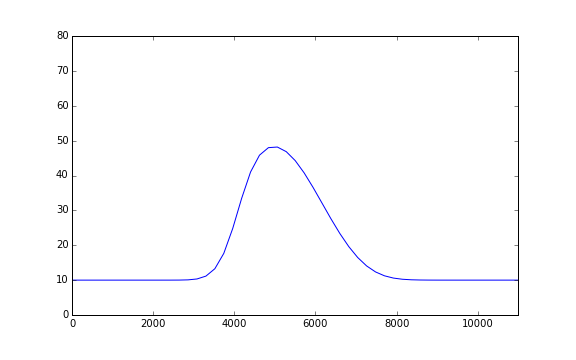
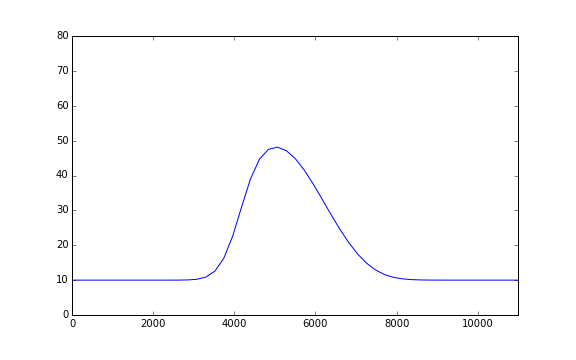
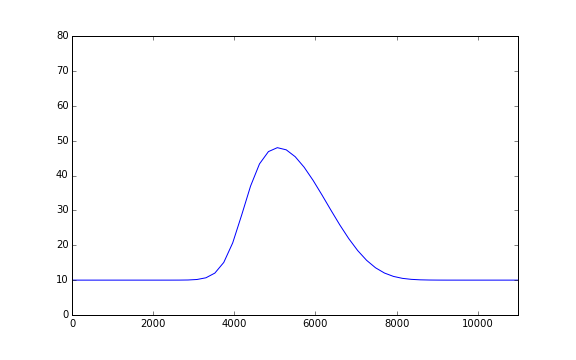
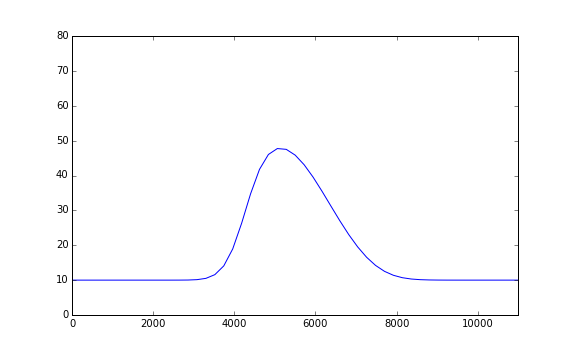
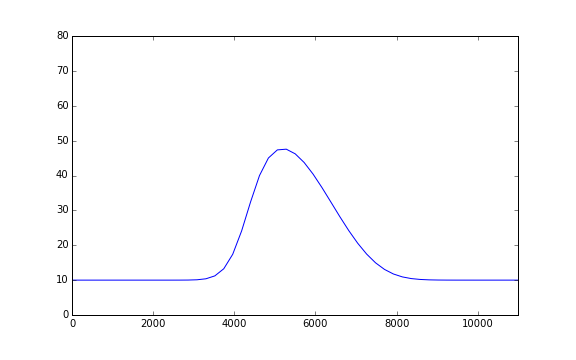
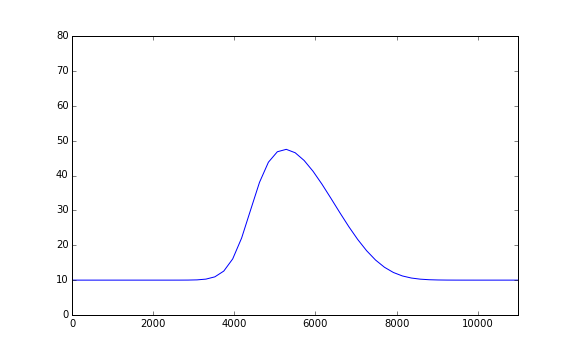
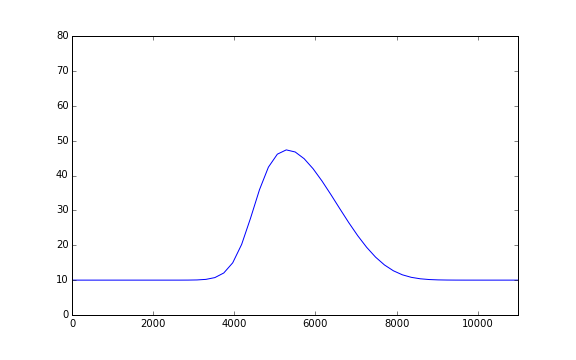
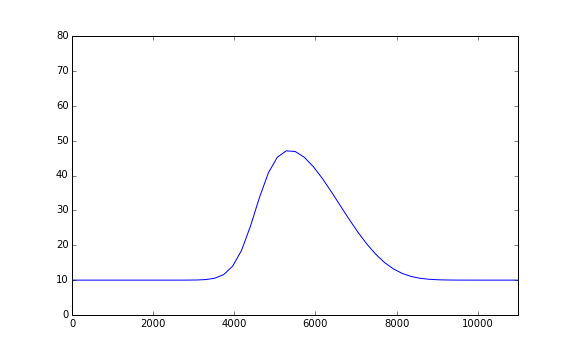
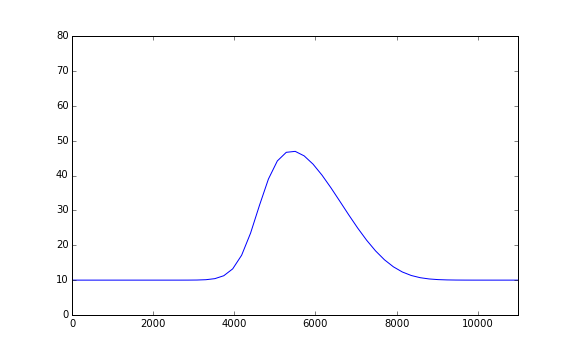
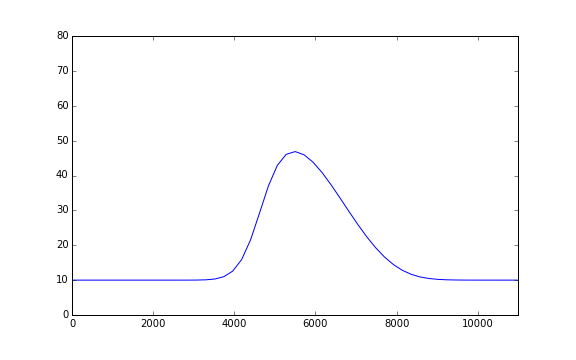
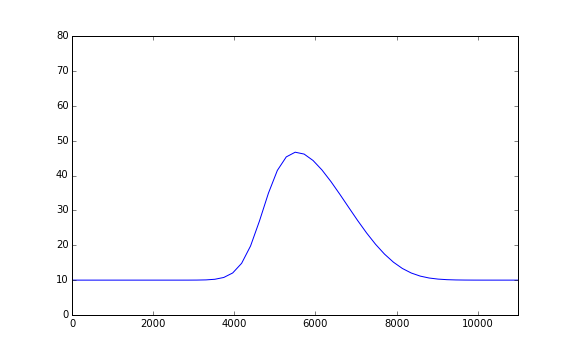
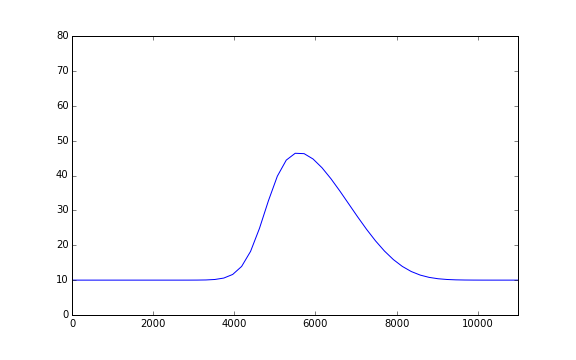
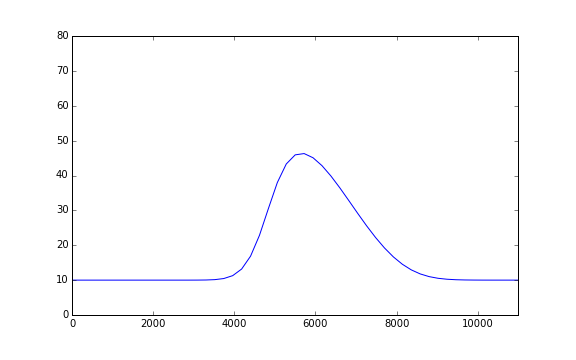
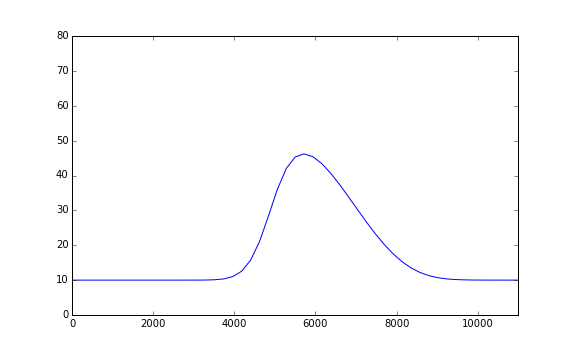
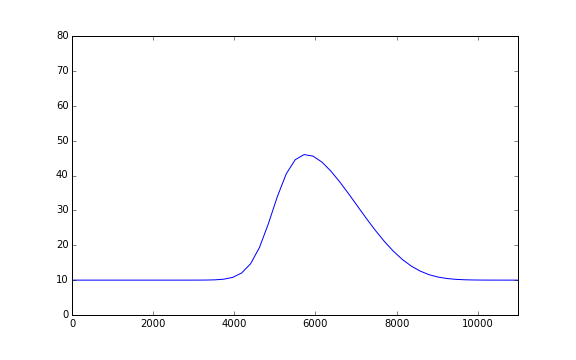
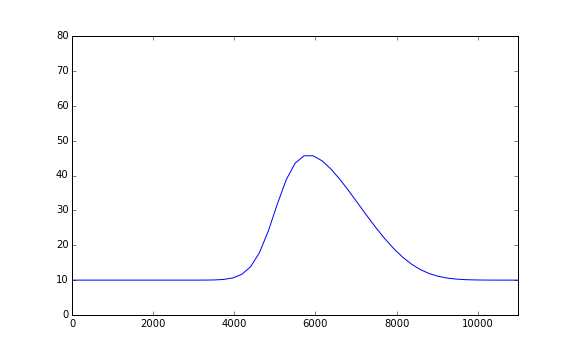
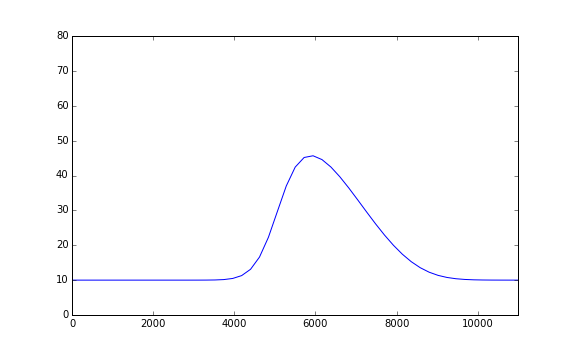
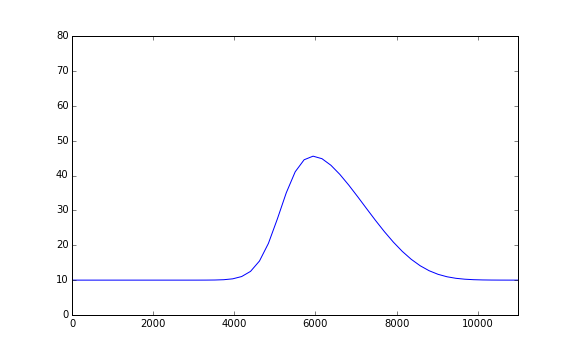
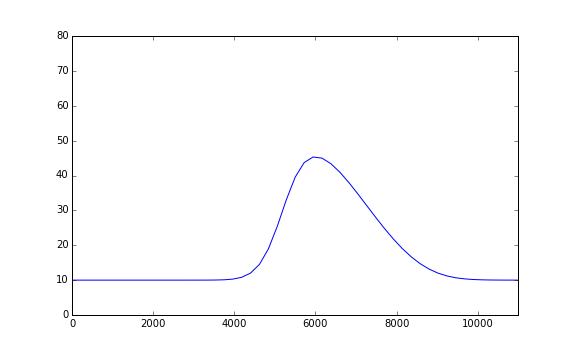
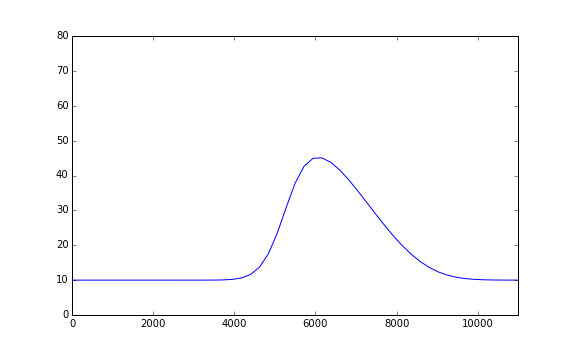
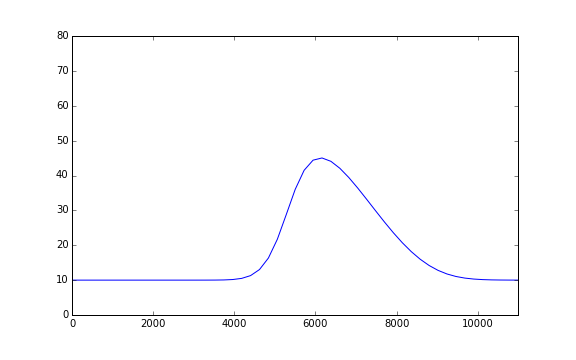
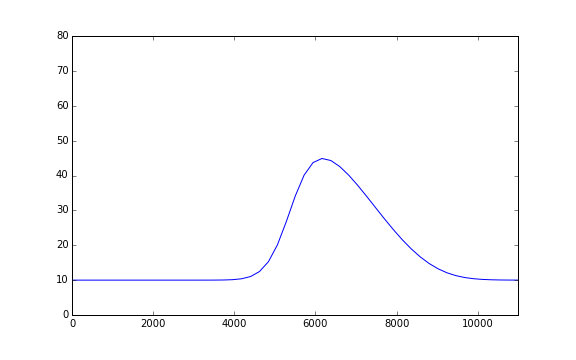
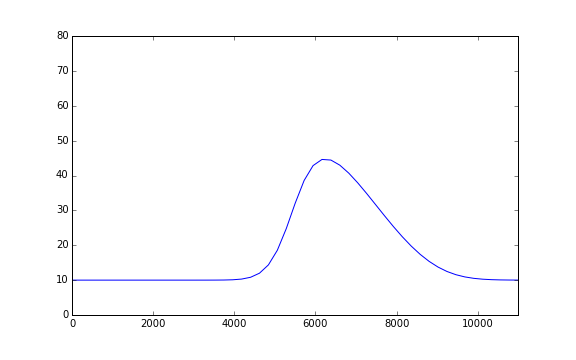
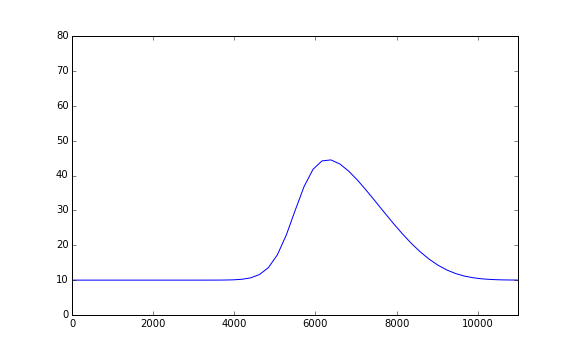
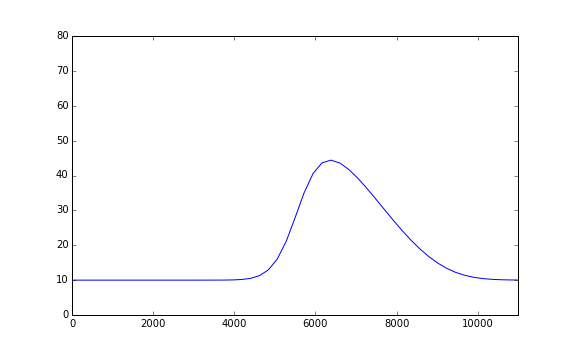
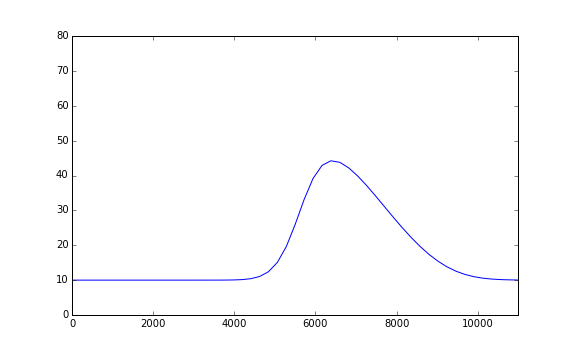
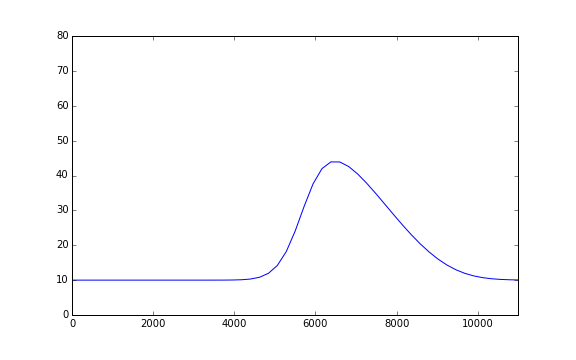
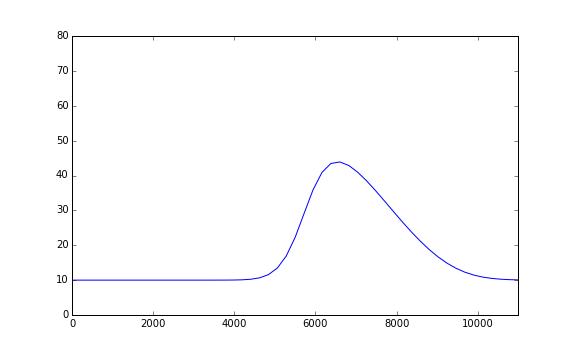
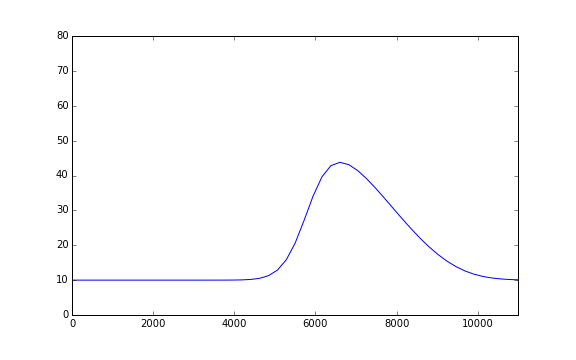
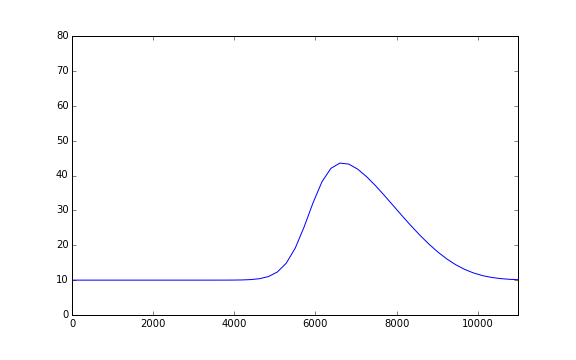
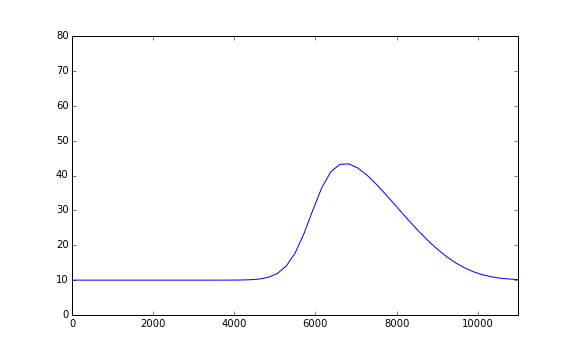
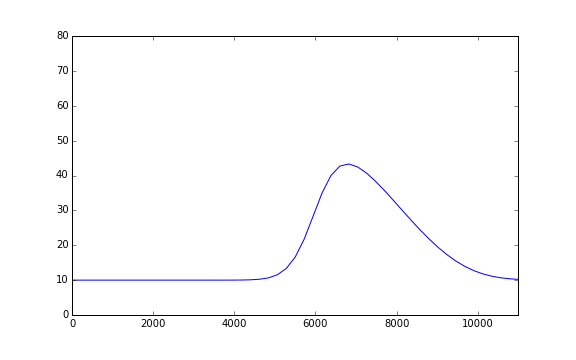
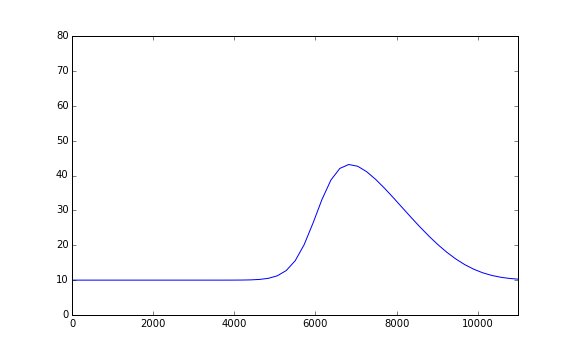
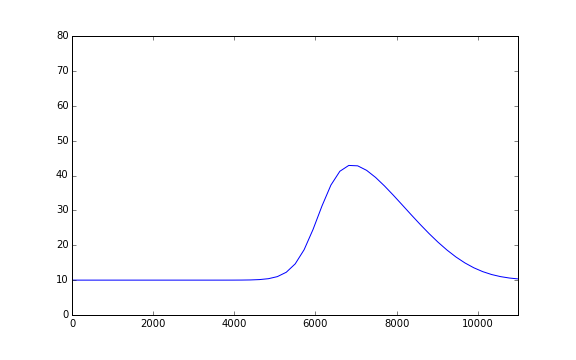
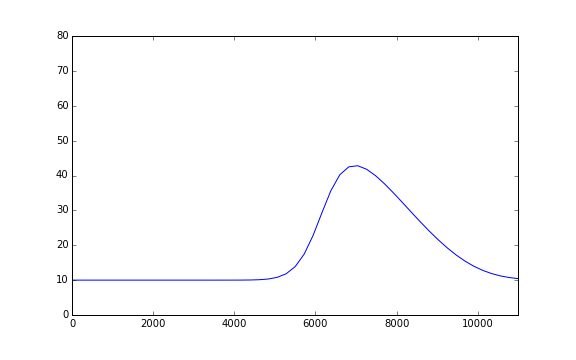
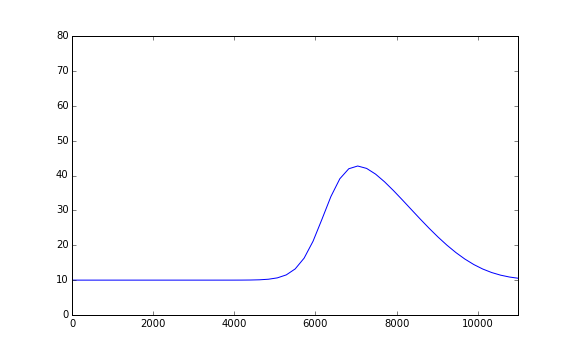
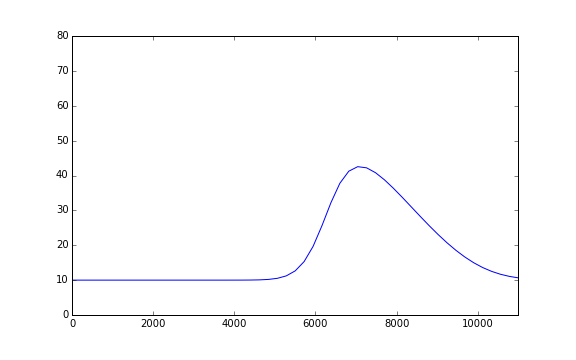
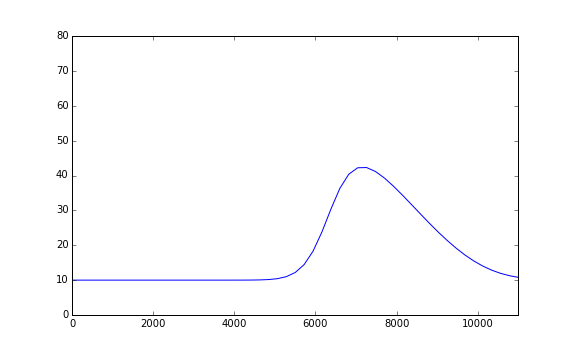
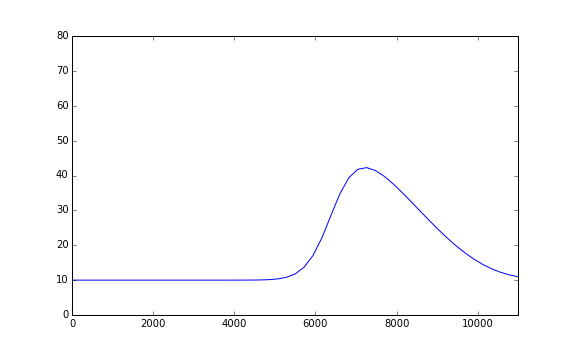
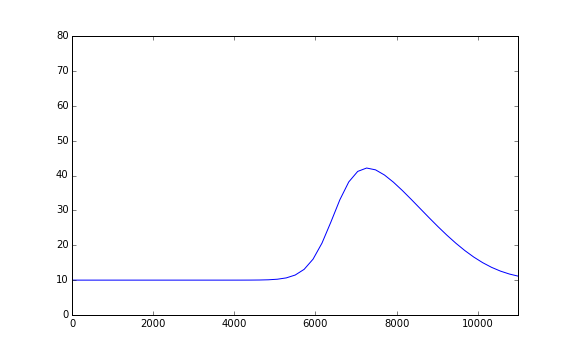
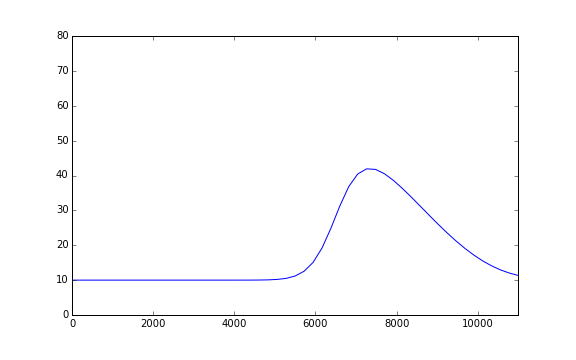
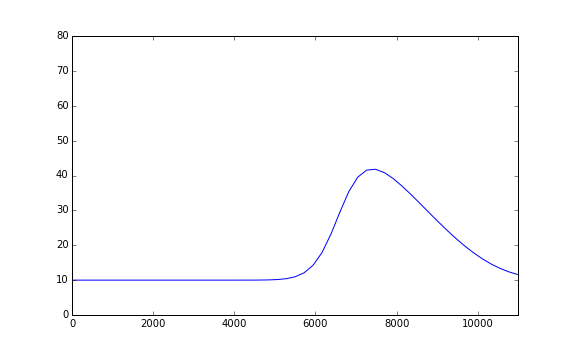
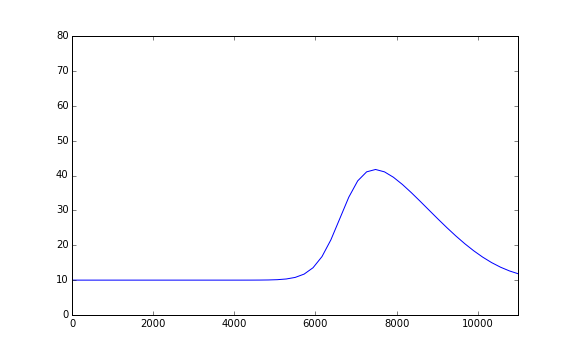
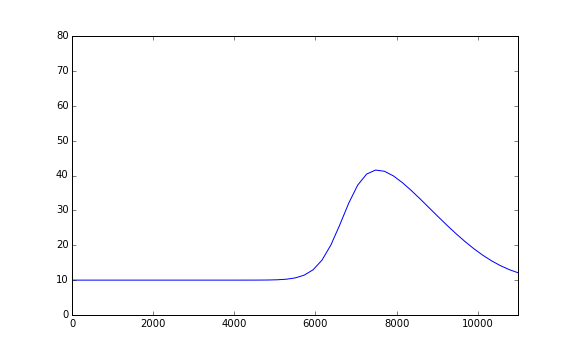
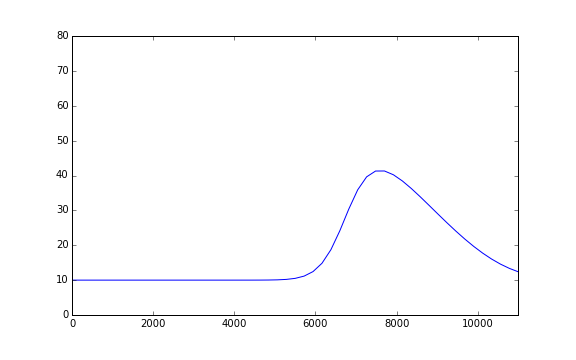
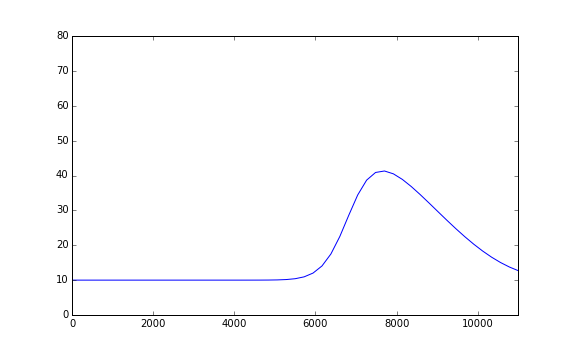
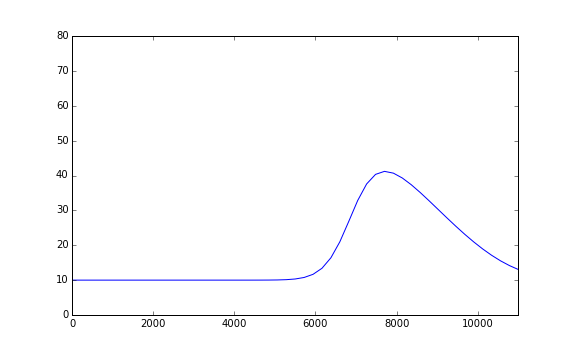
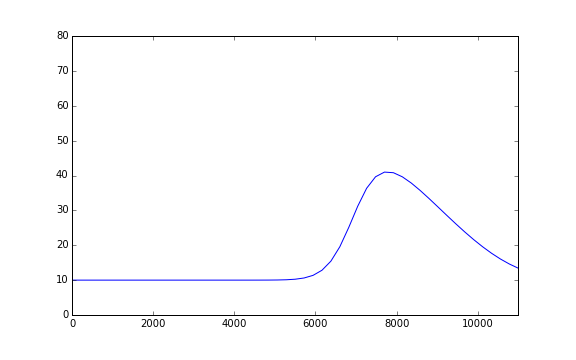
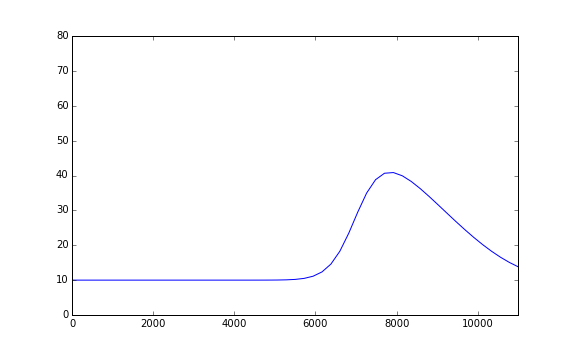
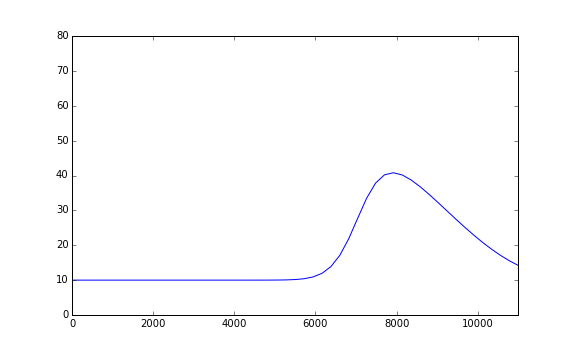
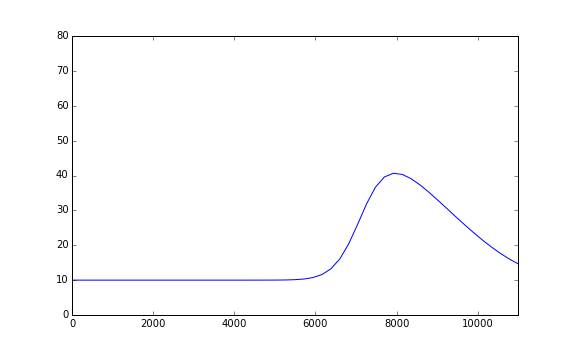
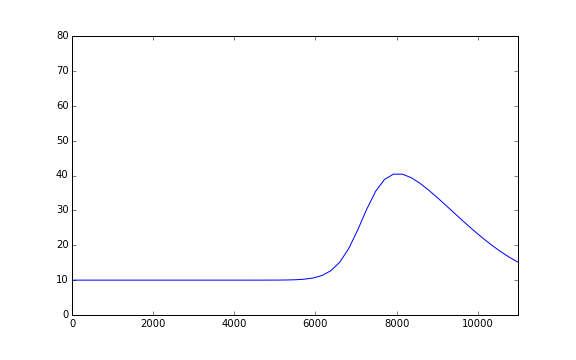
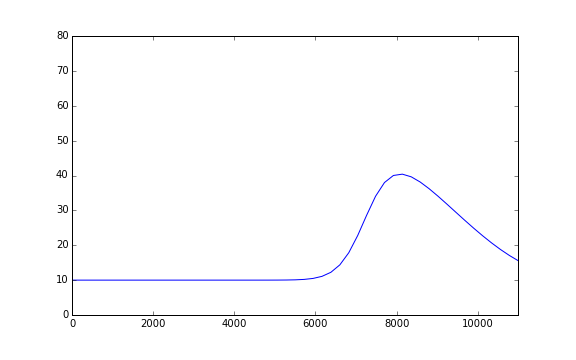
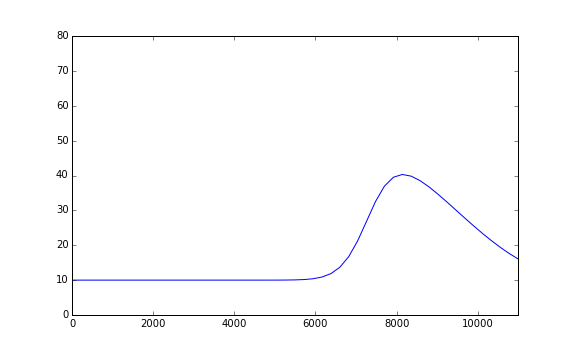
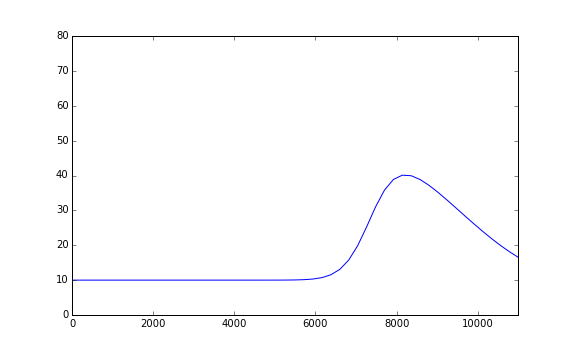
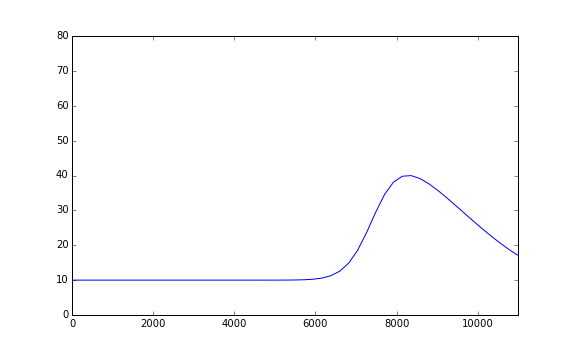
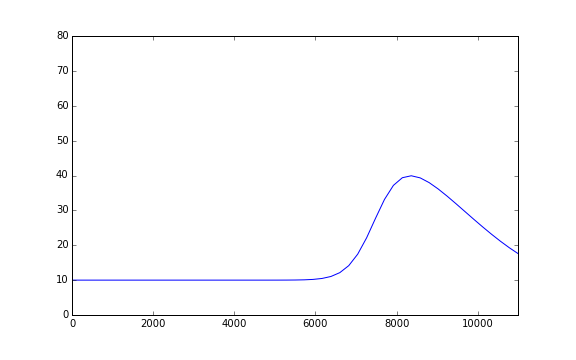
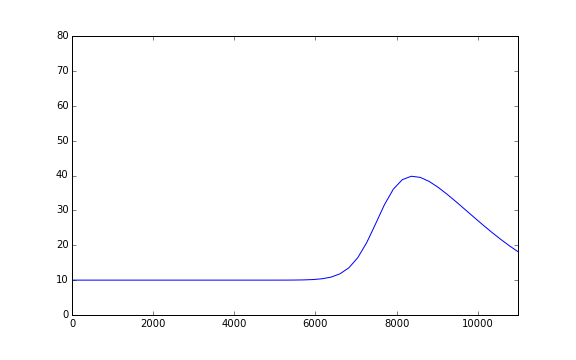
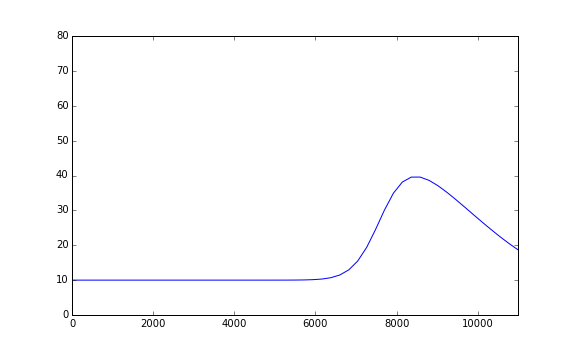
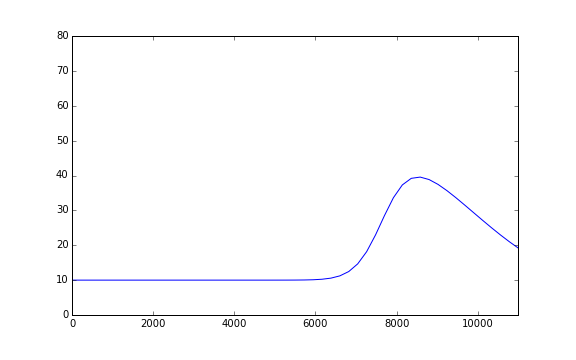
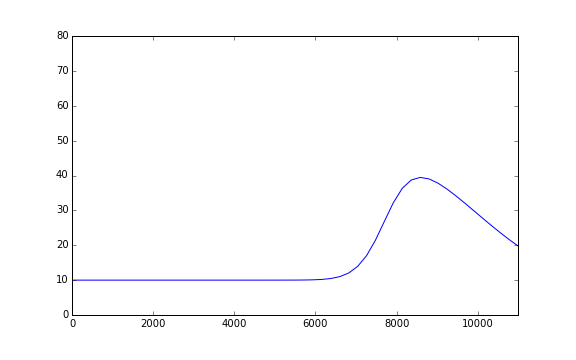
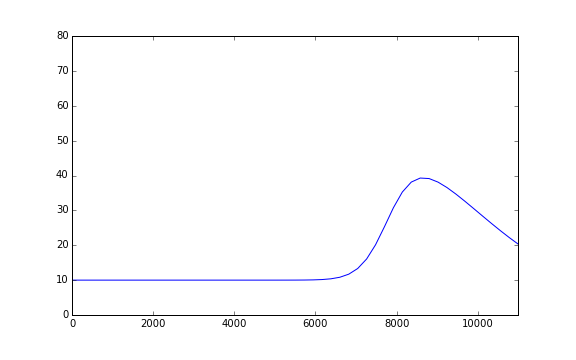
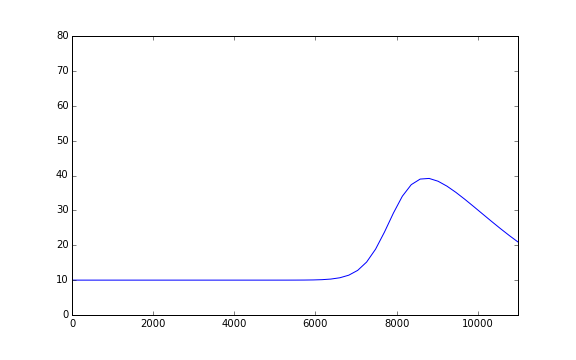
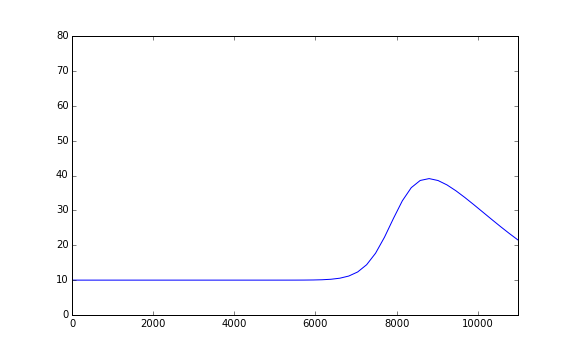
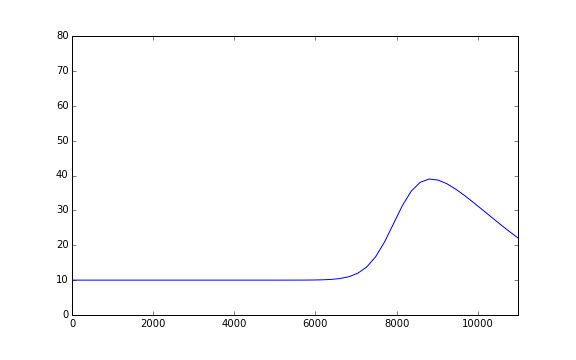
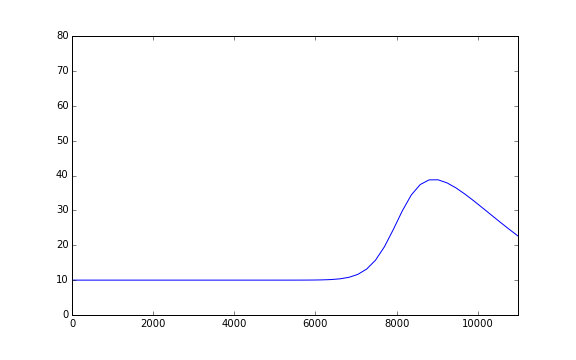
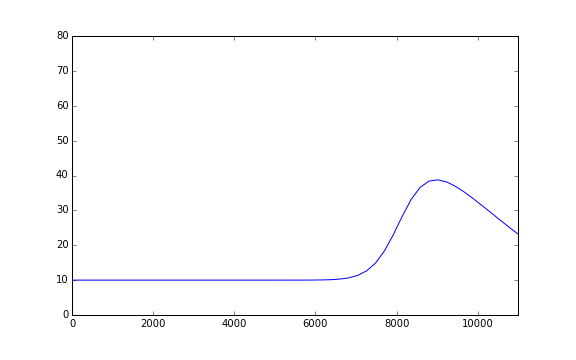

In [33]:
# Creation of the animation
fig = plt.figure(figsize=(8,5))
ax = plt.axes(xlim=(0,11000), ylim=(0,80))
line = ax.plot([], [])[0]

anim.FuncAnimation(fig, lambda i: set_plot(i, line, x, rho),
                        frames=nt, interval=80)

### Second set of inital conditions

Let's take the following values for the second simulation:
* $V_{max}=37.78m/s$
* $\rho(0,t)=20$
* $\rho(x/[10,20],0) =20 \\\rho([10,20],0) = 50$

In [34]:
# Initial coniditions
t_to_sim = 180
nt = int(t_to_sim/dt)

rho0 = npy.ones(nx)*20.0
rho0[10:20] = 50.0

# Creation of the array to save the datas for the plot
rho = npy.empty((nt, 51))
rho[0, :] = rho0

solve(rho0, lambda n: 20.0, lambda u: flux(u, Vmax = 37.78), \
      dt, dx, nt, lambda n, u: save_data(n, u, rho))

# The average speed at t=3min is given at the 49th line of the array
print(speed(npy.mean(rho[49, :]),Vmax=37.78))
# For the minimum speed, we need the maximum density
print(speed(npy.amax(rho[49, :]),Vmax=37.78))

33.87248308
30.948046861


* The average speed at $t=3min$ is $V=33.87 m/s$
* The minimum speed at time $t=3min$ is $V=30.94m/s$


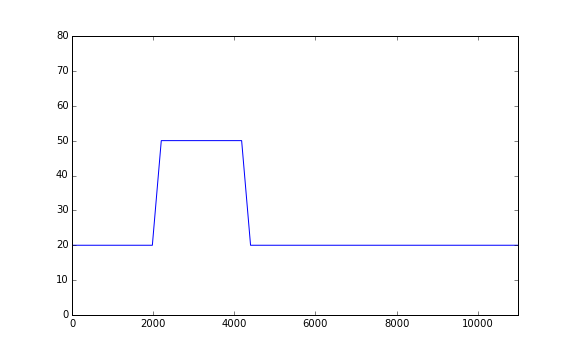
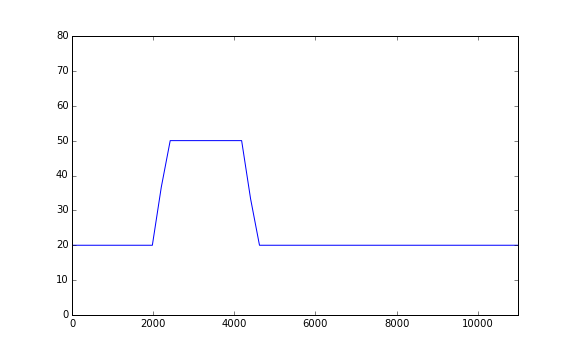
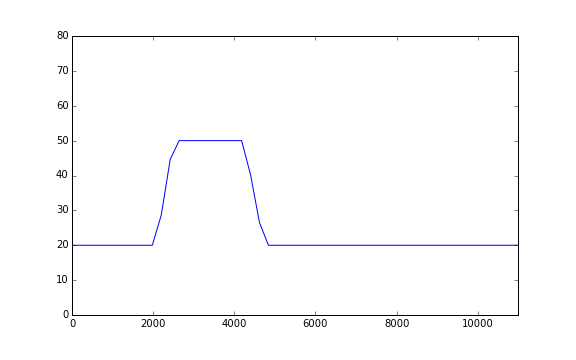
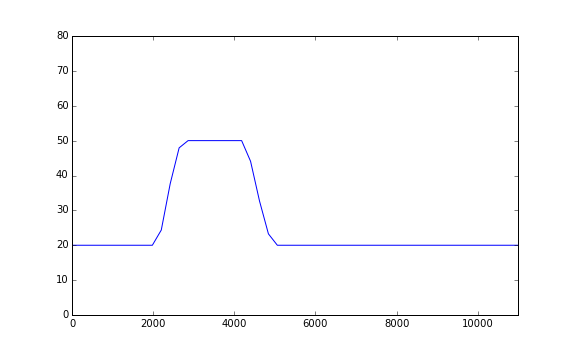
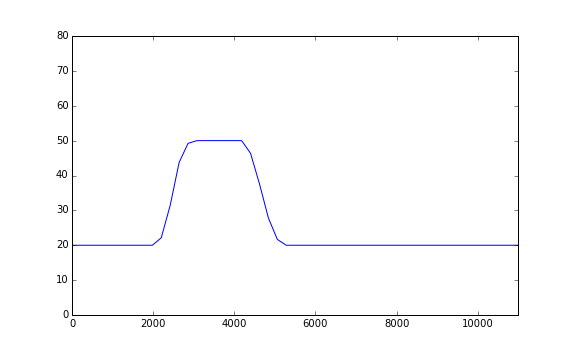
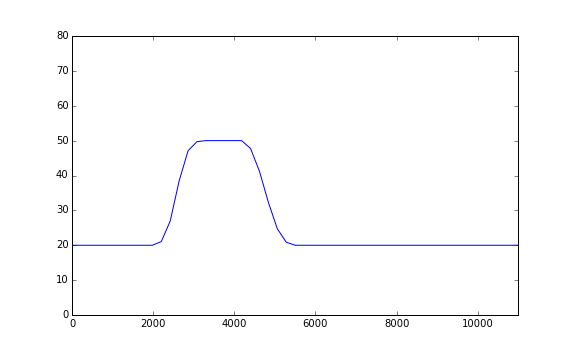
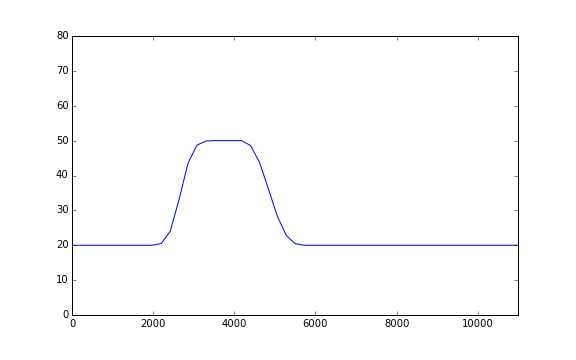
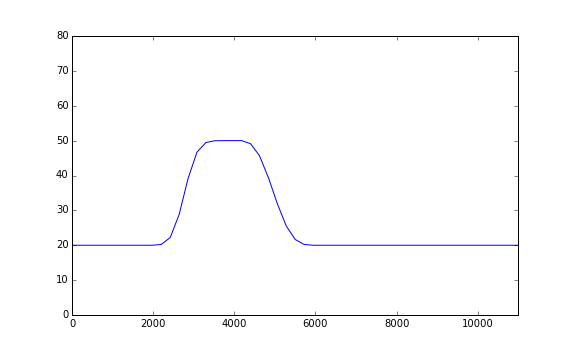
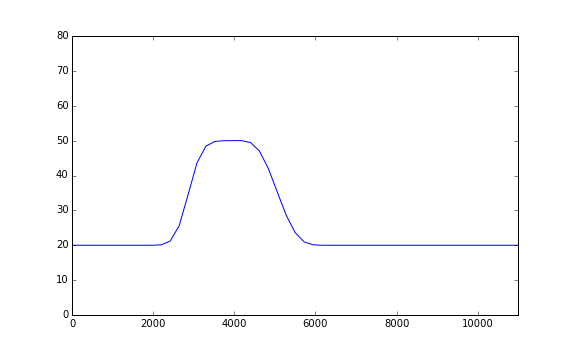
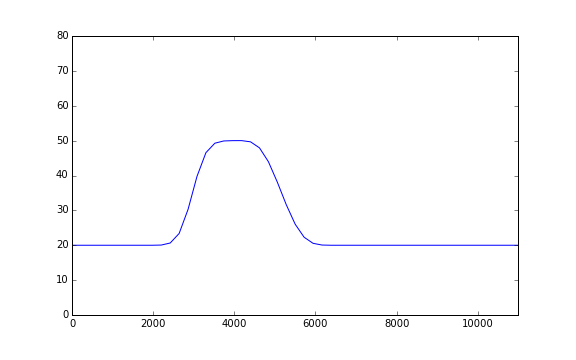
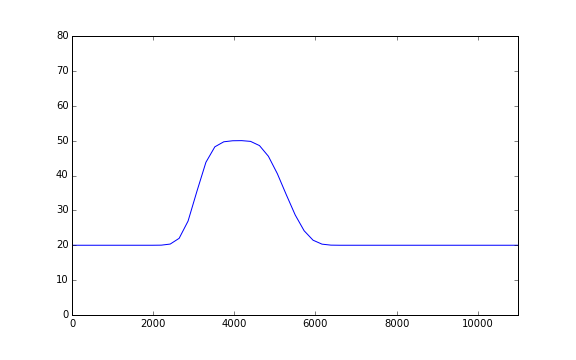
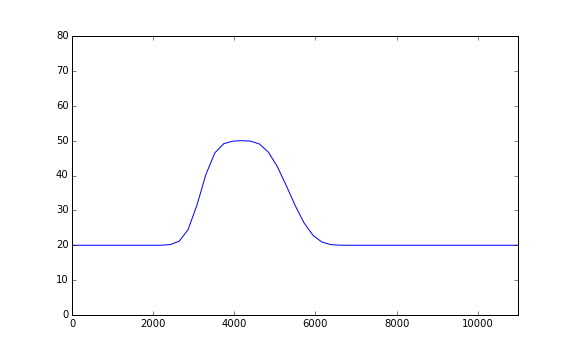
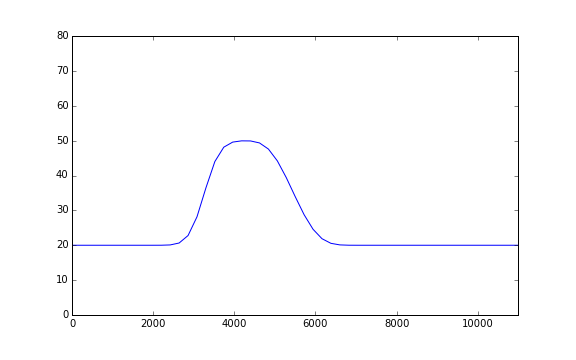
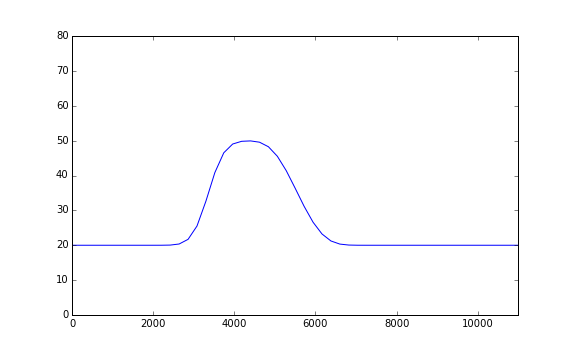
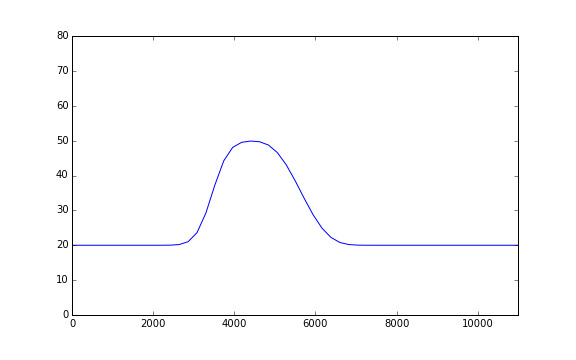
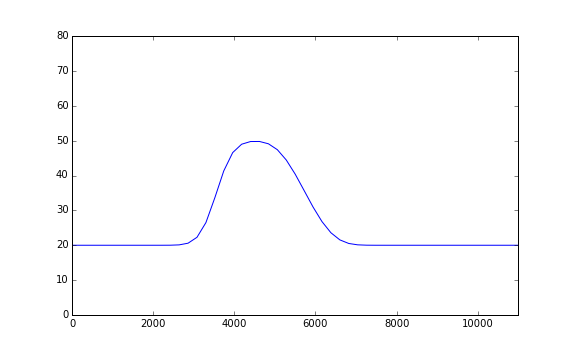
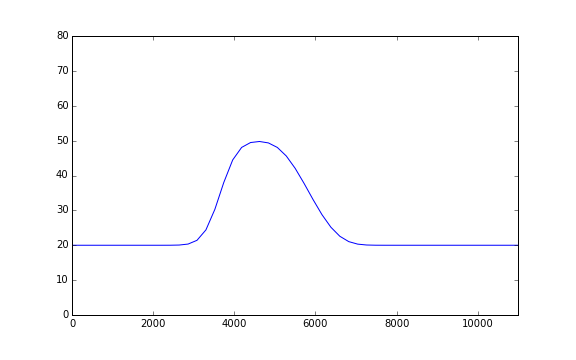
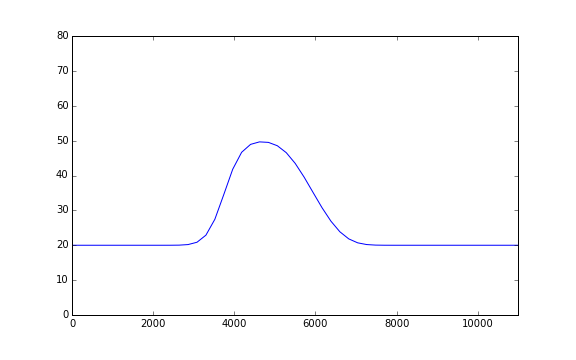
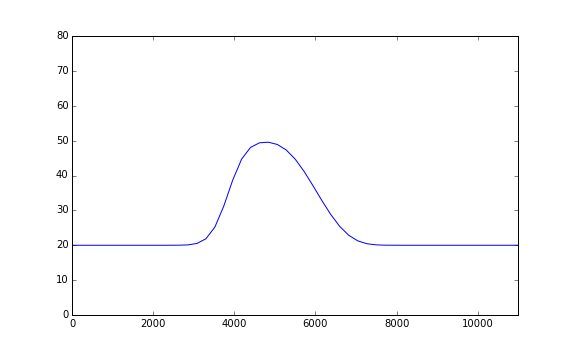
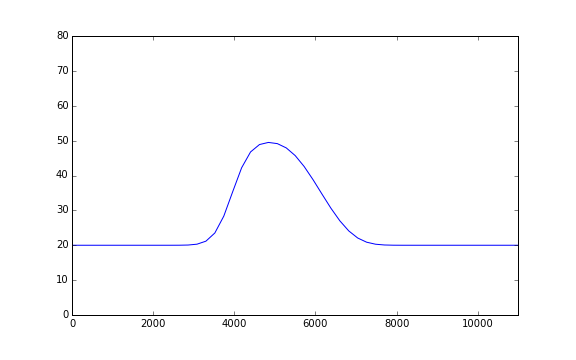
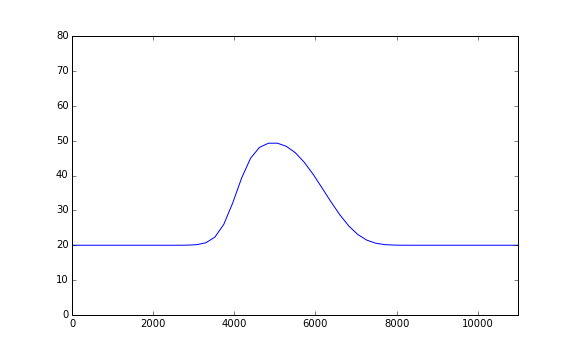
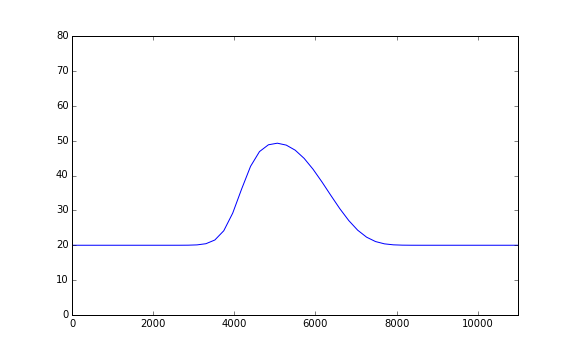
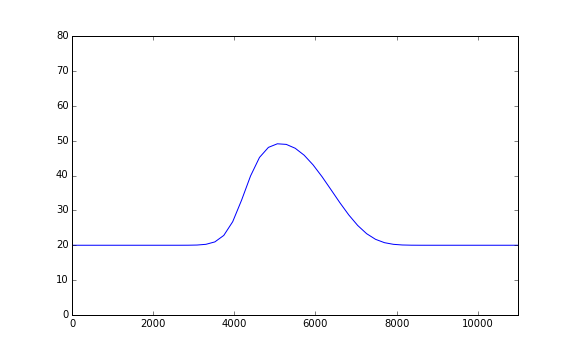
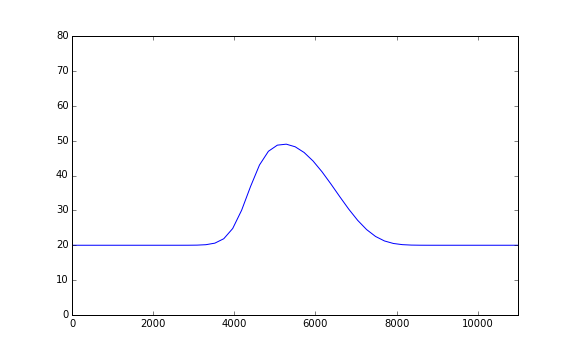
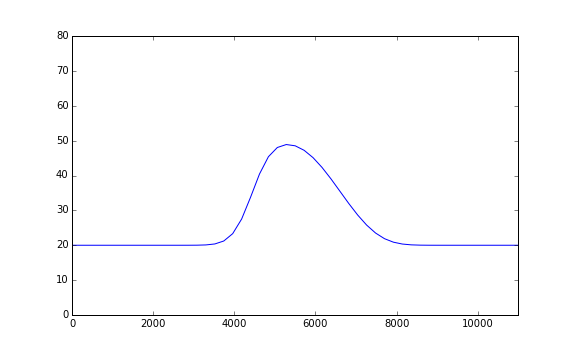
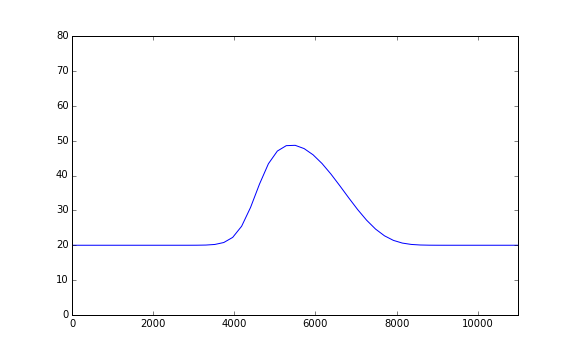
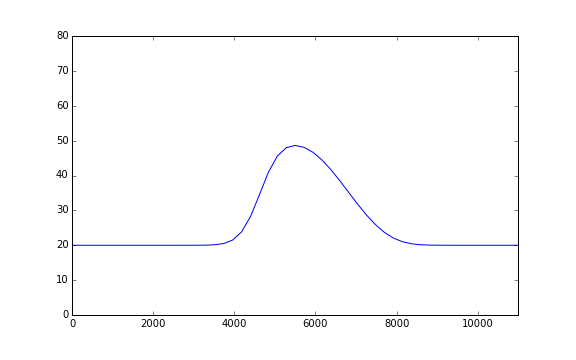
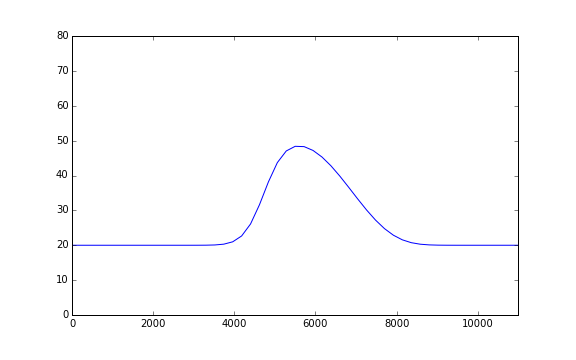
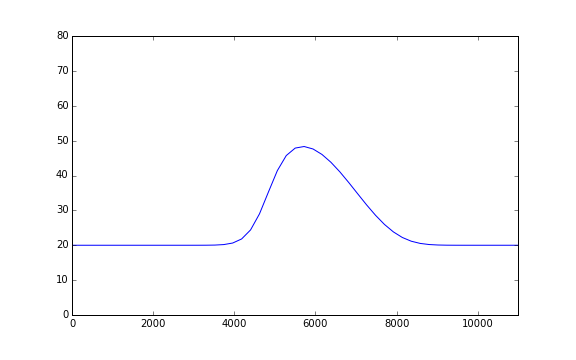
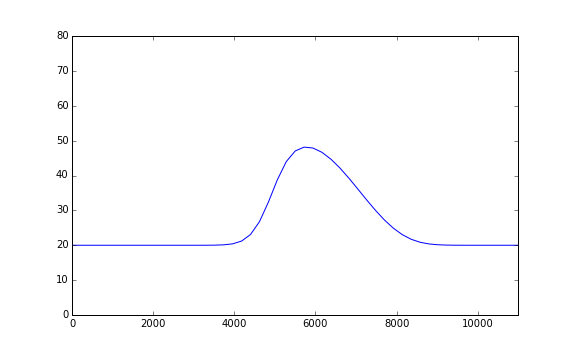
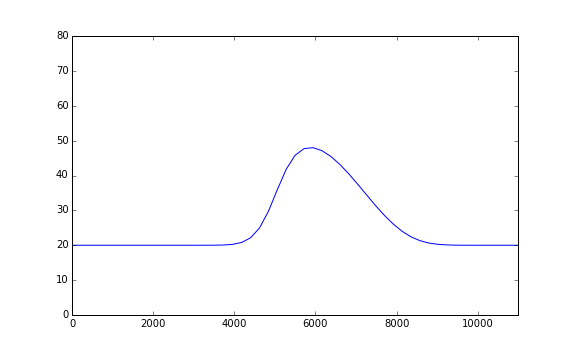
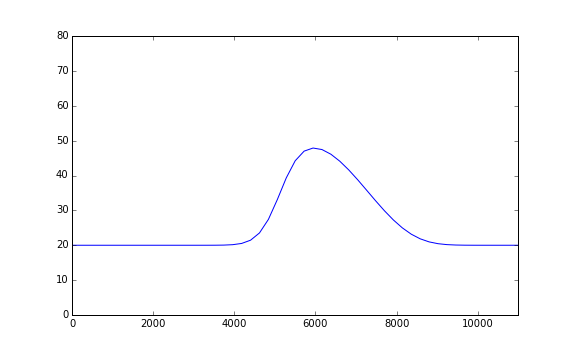
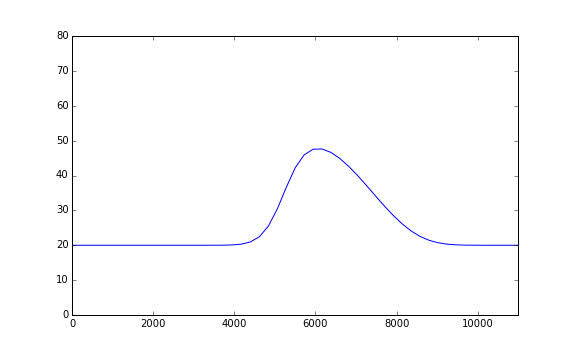
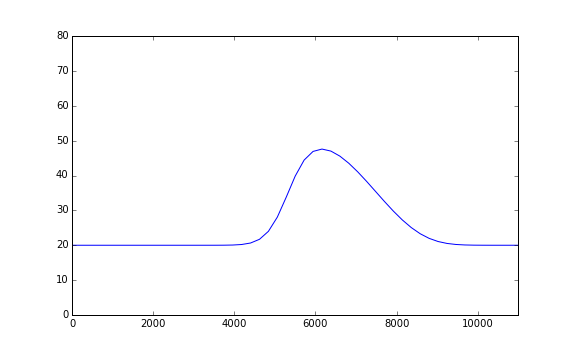
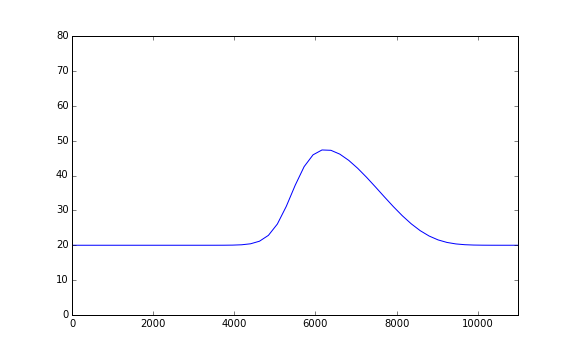
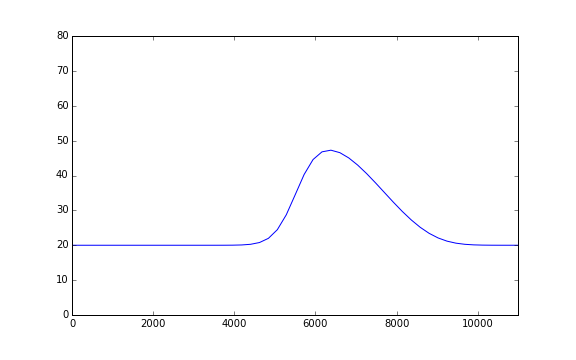
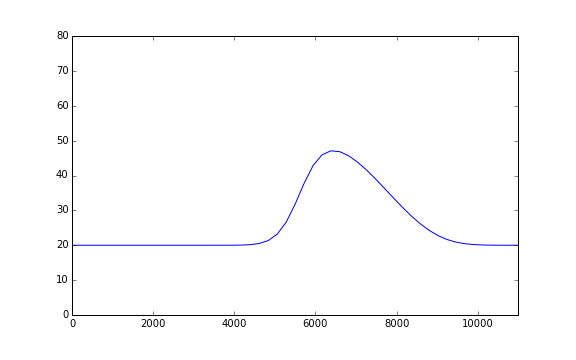
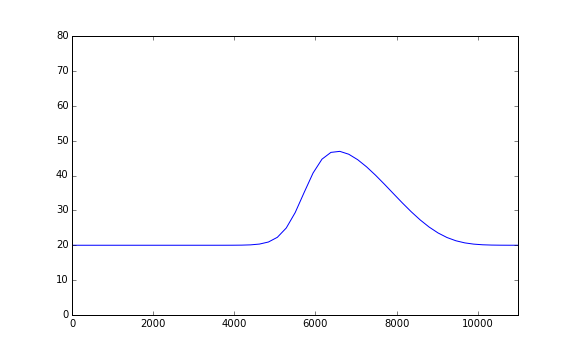
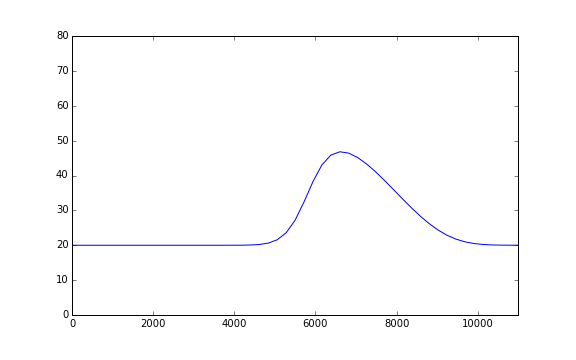
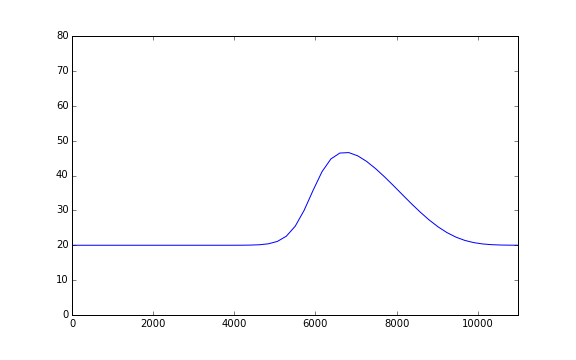
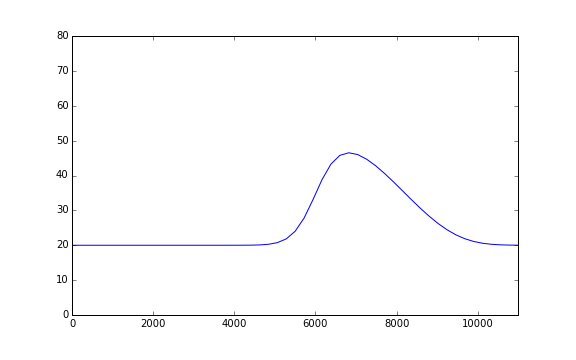
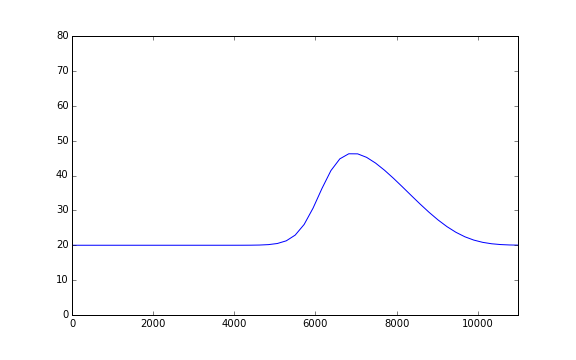
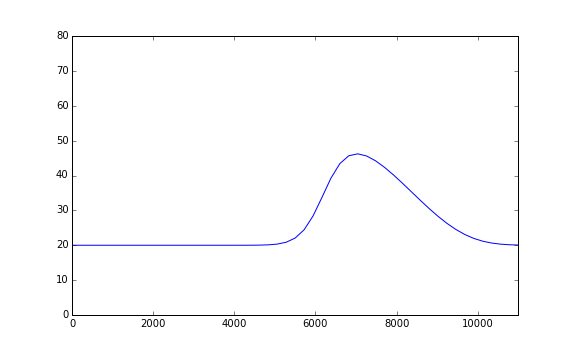
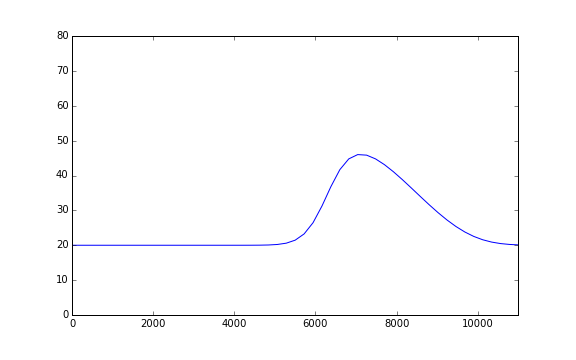
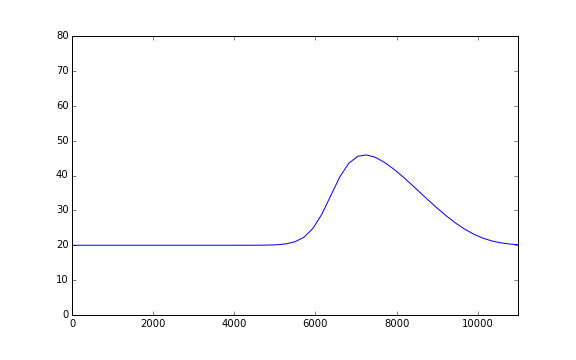
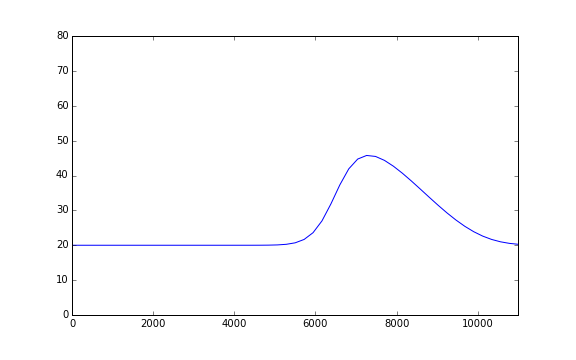
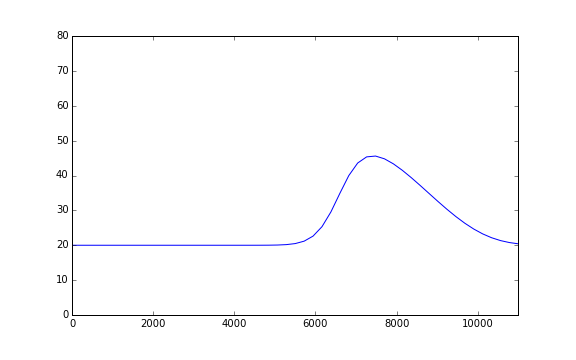
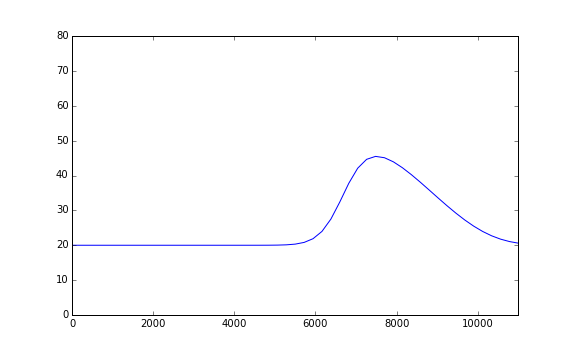
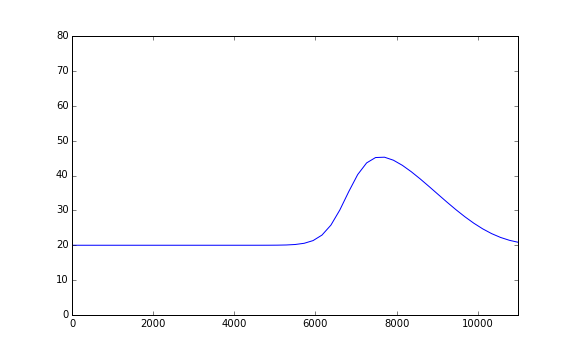
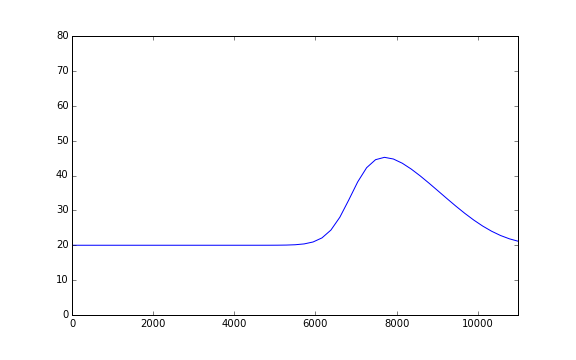

In [35]:
# Creation of the animation
fig = plt.figure(figsize=(8,5))
ax = plt.axes(xlim=(0,11000), ylim=(0,80))
line = ax.plot([], [])[0]

anim.FuncAnimation(fig, lambda i: set_plot(i, line, x, rho),
                        frames=nt, interval=80)

## Conclusion

It was interesting to model a real life problem with numerical analysis. We can see from our amazing animations that, like in a real situation, cars in front of the traffic jam drive at a higher speed than those in the middle of it. Also, the traffic tends to vanish in time if the road is clear.£

##### Source

(1) We used the following lectures https://github.com/numerical-mooc/numerical-mooc available under Creative Commons Attribution license CC-BY 4.0, (c)2014 L.A. Barba, C. Cooper, G.F. Forsyth, A. Krishnan.

---
###### The cell below loads the style of this notebook. 

In [36]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())